In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customers-churned-in-telecom-services/customer_churn_telecom_services.csv


## **1. Introduction**

#### **Problem**
Customer churn is a major challenge in the telecom industry, where competition is fierce and retaining customers is more cost-effective than acquiring new ones. Churn occurs when a customer discontinues their service, and understanding the factors that lead to churn can help telecom companies improve customer retention, optimize marketing efforts, and enhance service offerings.

What causes churn in telecoms?
- Poor service experience
- Poor customer service or experience
- Easy to switch providers
How to reduce churn rate in telecoms?
- Improve customer service
- Create a memorable customer experience
- Invest in new technologies
- Make Better use of data

In this project, we aim to develop a machine learning model to predict customer churn based on various demographic, service-related, and billing factors. By leveraging this model, telecom companies can:

- ✅ Identify at-risk customers early and take proactive steps to retain them.
- ✅ Understand key factors influencing churn, such as contract type, internet service, and customer support.
- ✅ Optimize pricing, services, and customer support to improve customer satisfaction.

#### **Dataset Overview**
The dataset contains customer information, contract details, service usage, and billing details. Key features include:

- **Demographics**: Gender, Senior Citizen status, Partner, Dependents.
- **Service Details**: Phone service, Internet service type, Streaming services, Tech support, and Security options.
- **Contract & Billing**: Contract type, Paperless billing, Payment method, Monthly and Total charges.
- **Churn (Target Variable)**: Indicates whether the customer has left the service.

#### **Project Overview**
To build an effective Customer Churn Prediction System, we will follow a structured approach:

1️⃣ Problem Definition & Business Understanding – Analyzing why churn matters and how businesses can act on predictions.

2️⃣ Exploratory Data Analysis (EDA) – Identifying trends, correlations, and customer behaviors associated with churn through visualizations.

3️⃣ Data Preprocessing – Handling missing values, encoding categorical variables, feature scaling, and balancing the dataset.

4️⃣ Model Selection & Training – Training multiple classification models, such as:

- Logistic Regression
- Random Forest
- XGBoost
- Support Vector Machine (SVM)

5️⃣ Model Evaluation & Comparison – Measuring performance using Accuracy, Precision, Recall, F1-Score, and ROC-AUC to determine the best model.

## 2. Prerequisites

In [41]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [42]:
# load data
df = pd.read_csv('/kaggle/input/customers-churned-in-telecom-services/customer_churn_telecom_services.csv')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 3. Dataset Cleaning

Before we begin cleaning our data, let's take a quick look at some aspects of the dataset.

In [43]:
df.shape

(7043, 20)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [45]:
# check for null variables
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [46]:
# print columnns with missing values
missing_columns = df.columns[df.isnull().any()]
print("Columns with missing values:", missing_columns.tolist())

Columns with missing values: ['TotalCharges']


In [47]:
# check for duplicates
df.duplicated().sum()

22

In [48]:
# check whether missing values correspond to new customners (tenure=0)
df[df["TotalCharges"].isnull()][["tenure", "TotalCharges"]]

,tenure,TotalCharges
488,0,NaN
753,0,NaN
936,0,NaN
1082,0,NaN
1340,0,NaN
3331,0,NaN
3826,0,NaN
4380,0,NaN
5218,0,NaN
6670,0,NaN


#### **Summary**

1. **DatasetOverview:**
    - The dataset contains 7,043 rows and 20 columns, with a mix of numerical and categorical features.
    - The target variable is Churn (Yes/No), indicating whether a customer left the telecom company.
2. **Missing Values:**
    - Only TotalCharges has 11 missing values.
    - Investigation showed that these missing values correspond to customers with tenure = 0, meaning they are new customers who haven't been charged yet.
    - Solution: Missing values to be filled with 0.
3. **Duplicate Rows:**
    - Found 22 duplicate rows, which will be removed to avoid redundant data.
4. **Feature Types & Conversions:**
    - Churn (Yes/No) needs to be encoded as binary (1/0) for model training.


In [49]:
# remove duplicated rows
df = df.drop_duplicates(keep="first").reset_index(drop=True)

In [50]:
# check to see that only 22 rows were removed, there were 7043 rows before
df.shape

(7021, 20)

In [51]:
# handle missing values then check if there are still any left
df["TotalCharges"] = df["TotalCharges"].fillna(0).astype(float)
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 4. EDA

Before selecting and training a model on our clean dataset, we need to visualize the distribution and relationships between all and cetain variables for better model efficiency. 
- We will first visualize the distribution of churned vs. non-churned customers. This helps us ascertain if the dataset is balanced or imbalanced.
- We will also check the distribution of tenure (number of months a customer has stayed) is a crucial factor. This will show how long most customers stay before possibly churning.
- It is also important to visualize if customers with different contract types churn at different rates since contract type likely affects churn, with month-to-month contracts having higher churn.
- Additionally, we will check if there’s a pattern between monthly charges and churn to show if customers with higher monthly charges are more likely to churn.
- Finally we will check the distribution of categorical features

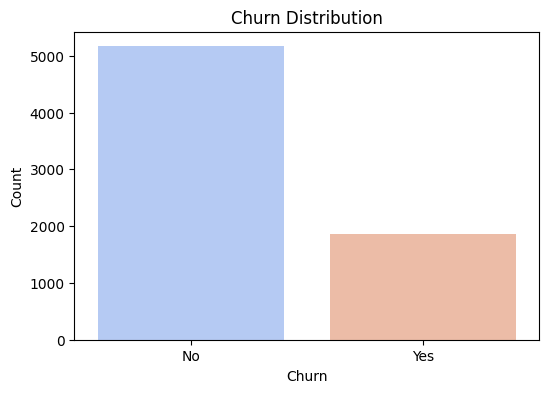

In [52]:
# churn vs non-churned distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Churn", palette="coolwarm")
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

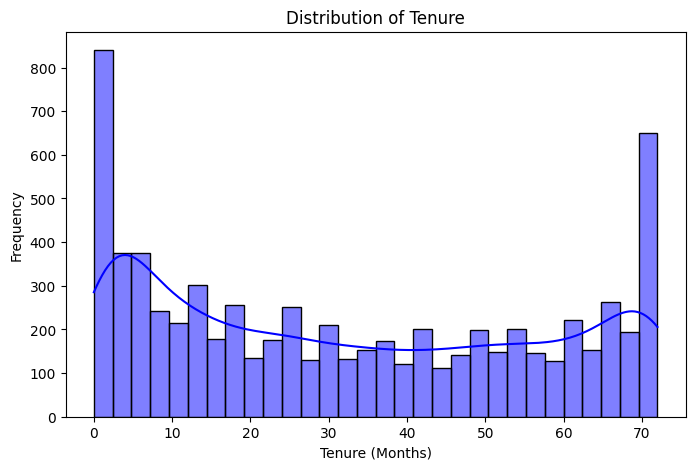

In [53]:
# tenure distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["tenure"], bins=30, kde=True, color="blue")
plt.title("Distribution of Tenure")
plt.xlabel("Tenure (Months)")
plt.ylabel("Frequency")
plt.show()

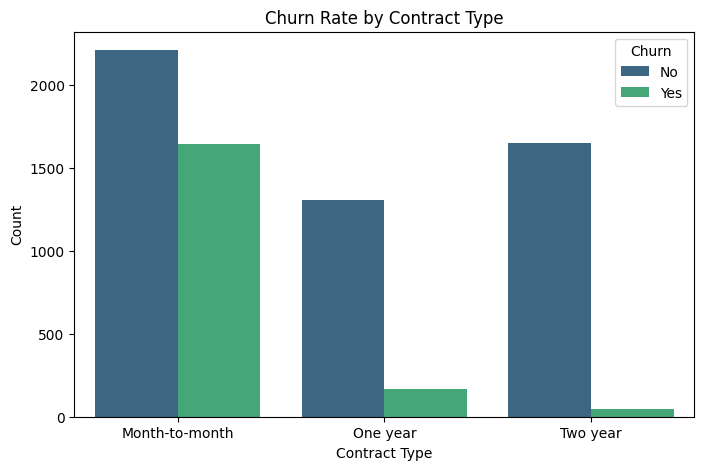

In [54]:
# churn rate by contract type
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Contract", hue="Churn", palette="viridis")
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.show()

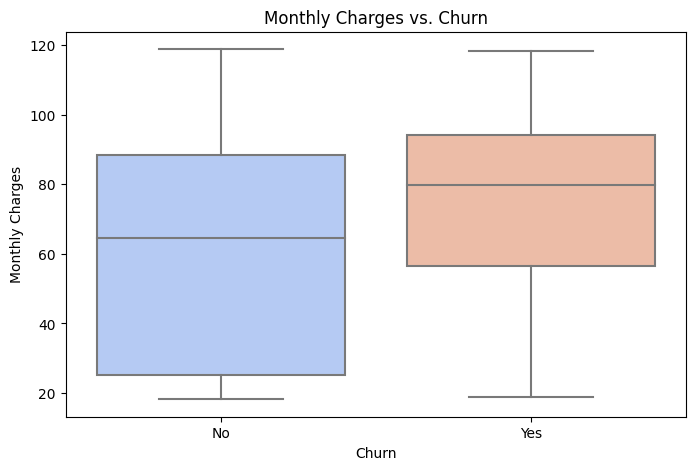

In [55]:
# monthly charges vs churn
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Churn", y="MonthlyCharges", palette="coolwarm")
plt.title("Monthly Charges vs. Churn")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()

In [56]:
# categorical features distribution

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Create a DataFrame showing the number of unique values for each categorical column
unique_values_df = pd.DataFrame({
    'Column': categorical_columns,
    'Unique Values Count': [df[col].nunique() for col in categorical_columns]
})
unique_values_df

,Column,Unique Values Count
0,gender,2
1,Partner,2
2,Dependents,2
3,PhoneService,2
4,MultipleLines,3
5,InternetService,3
6,OnlineSecurity,3
7,OnlineBackup,3
8,DeviceProtection,3
9,TechSupport,3


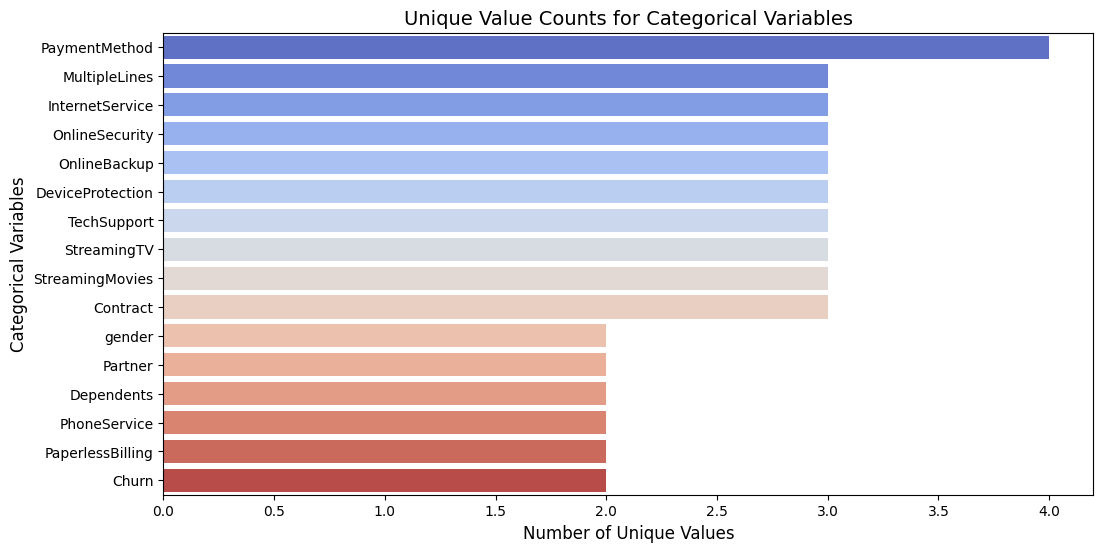

In [57]:
# Set figure size
plt.figure(figsize=(12, 6))

# Create a barplot for unique values in categorical variables
sns.barplot(
    x="Unique Values Count",
    y="Column",
    data=unique_values_df.sort_values(by="Unique Values Count", ascending=False),
    palette="coolwarm"
)

# Add titles and labels
plt.title("Unique Value Counts for Categorical Variables", fontsize=14)
plt.xlabel("Number of Unique Values", fontsize=12)
plt.ylabel("Categorical Variables", fontsize=12)

# Show plot
plt.show()

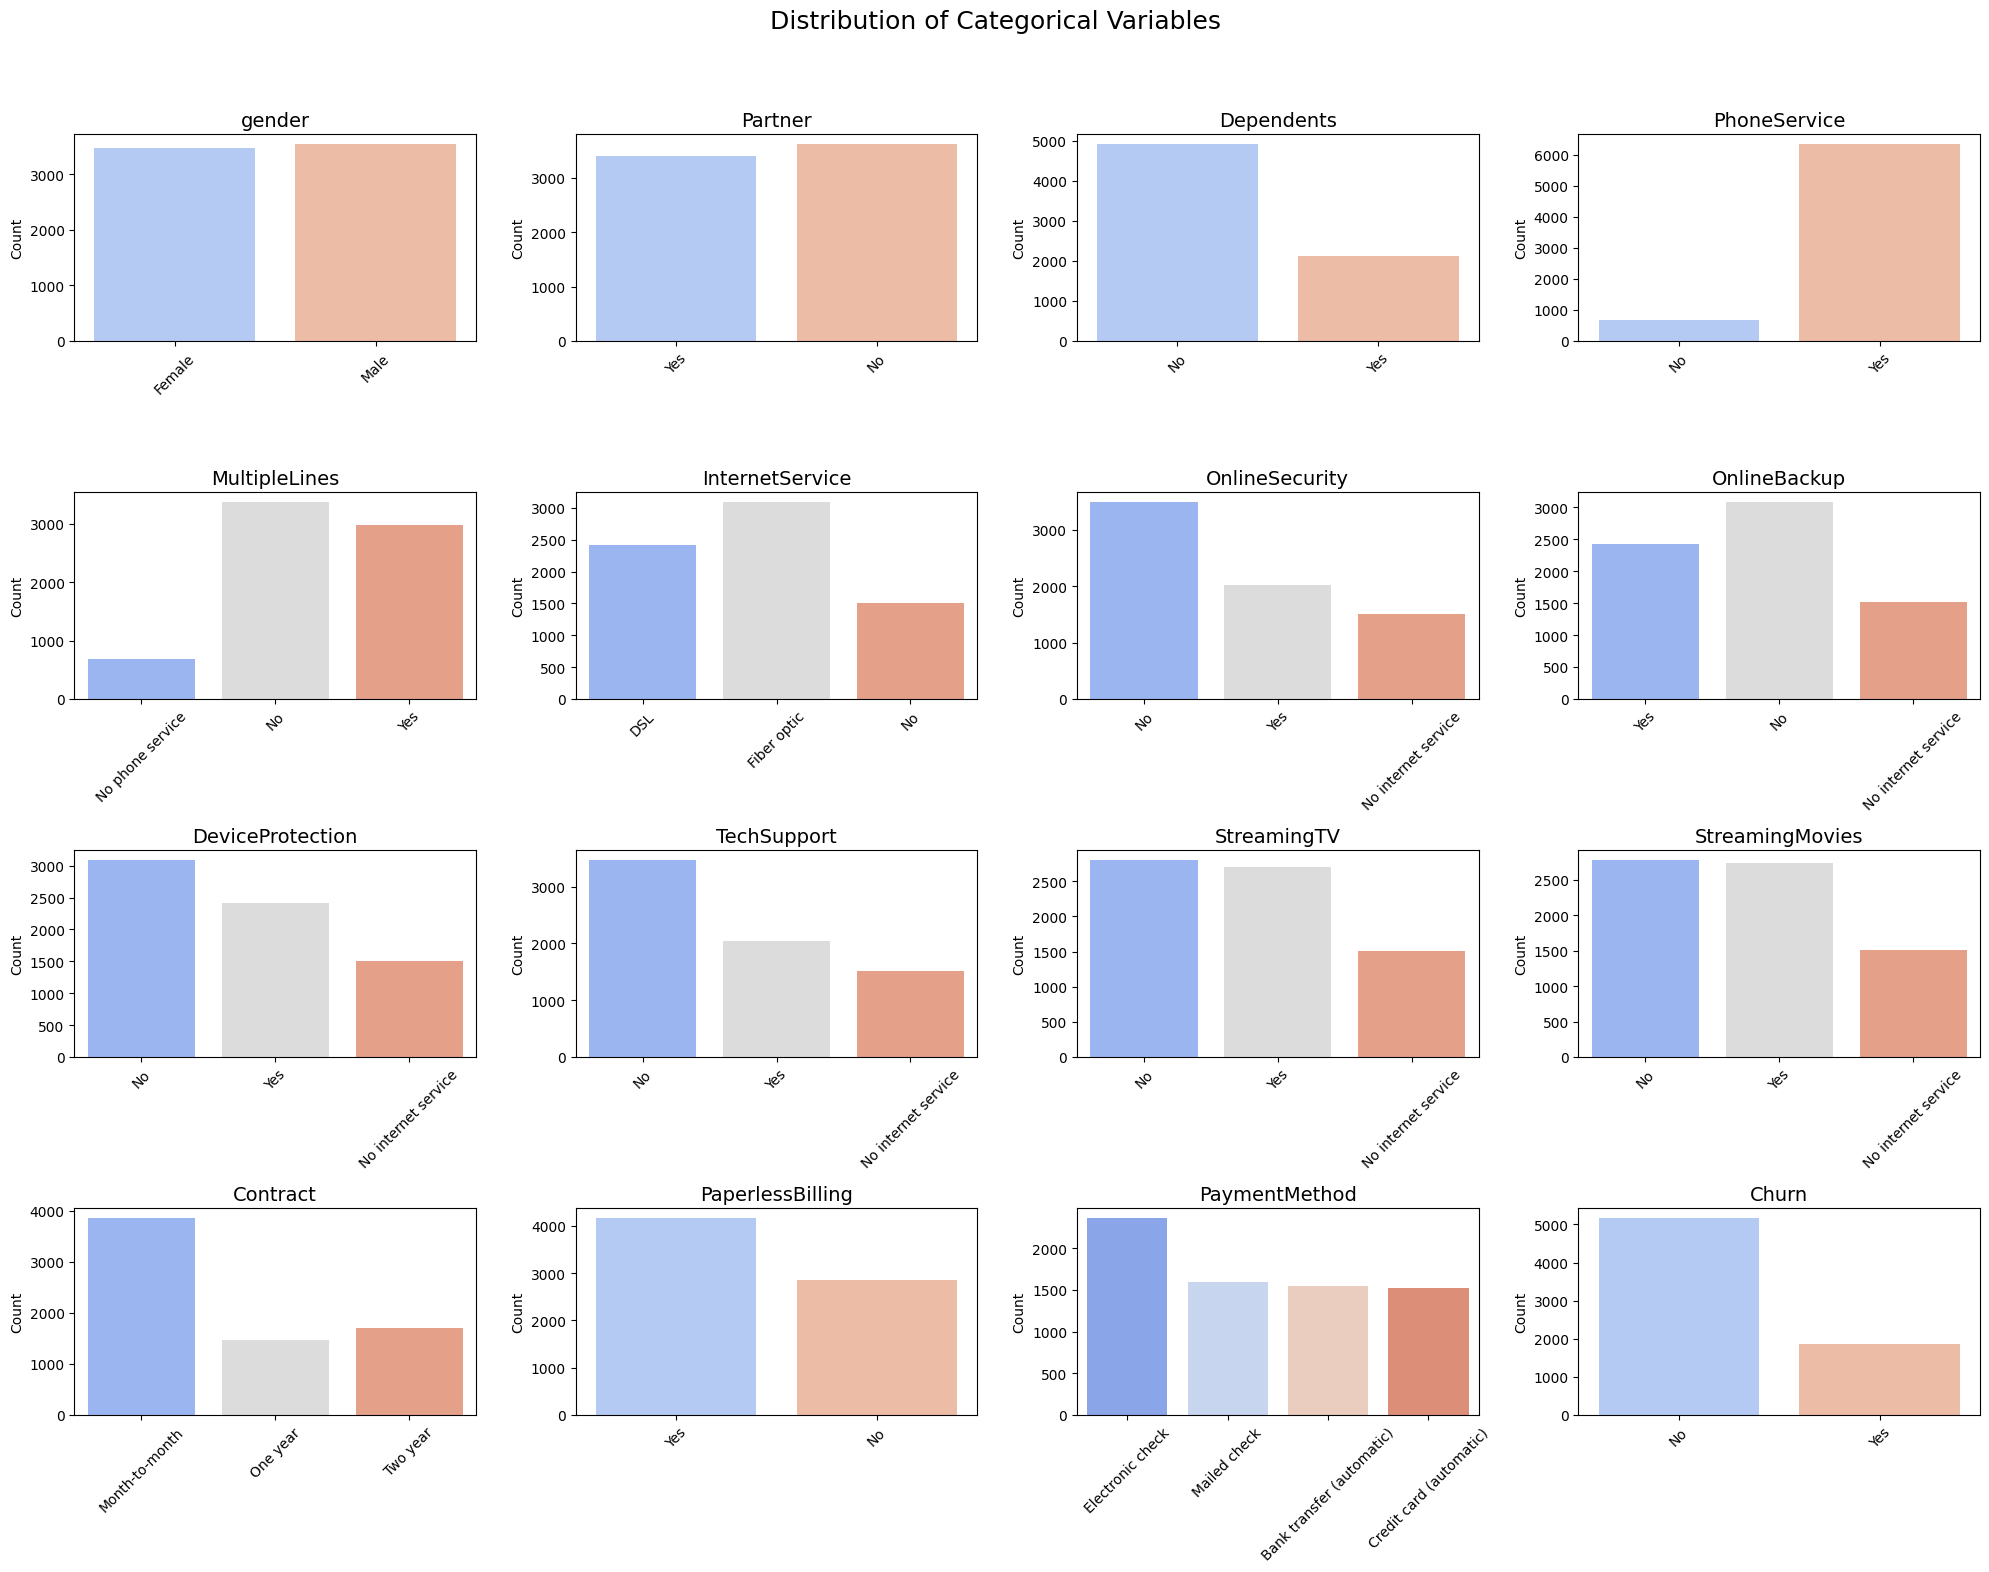

In [58]:
# Set up a 4x4 subplot grid
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
fig.suptitle("Distribution of Categorical Variables", fontsize=18)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each categorical variable's distribution
for i, col in enumerate(unique_values_df['Column']):
    sns.countplot(x=df[col], ax=axes[i], palette="coolwarm")
    axes[i].set_title(col, fontsize=14)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### **Notes on EDA**
1️⃣ Categorical Variables
- The categorical variables do not have high cardinality, meaning they contain a manageable number of unique values.
- Churn is influenced by several categorical features, such as contract type, internet service, and payment method.
- Visualizations indicate a strong relationship between churn and categorical variables, suggesting their importance in predictive modeling.
  
2️⃣ Imbalanced Target Variable
- The target variable Churn is imbalanced, meaning there are significantly more non-churned customers than churned ones.
- This imbalance can negatively impact model performance, leading to biased predictions.
- Resampling techniques (such as oversampling the minority class or undersampling the majority class) may be required to address this issue.
  
3️⃣ Impact of Numerical Variables
- The numerical features (tenure, MonthlyCharges, and TotalCharges) show strong correlations with churn, indicating their predictive significance.
- Customers with shorter tenure and higher monthly charges are more likely to churn.
  
4️⃣ Normality of Numerical Variables
- The numerical features do not follow a normal distribution, meaning their spread is skewed.

## 5. Data Preprocessing

Now that we have completed EDA, our next step, data preprocessing, include the following actions:
- **Handling categorical variables** → Convert them into numerical representations (One-Hot Encoding or Label Encoding).
- **Handling class imbalance** → Apply oversampling (SMOTE) or undersampling if needed.
- **Scaling numerical features** → Standardize or normalize tenure, MonthlyCharges, and TotalCharges.
- **Splitting the dataset** → Train-test split to prepare for model training.

#### **Encoding**

The best encoding method depends on the models we plan to use and the nature of our categorical variables. Here’s a breakdown:

1️⃣ One-Hot Encoding (OHE)
- ✅ Works best for linear models (e.g., Logistic Regression) because it maintains equal distance between categories.
- ✅ Ideal for algorithms that struggle with numerical category rankings (e.g., Support Vector Machines, Naive Bayes).
- 🚫 Can lead to high-dimensional data if there are many unique categories.

2️⃣ Label Encoding
- ✅ Works well with tree-based models (e.g., Random Forest, XGBoost) because they can handle categorical variables naturally.
- ✅ More efficient than OHE for models that do not require linear relationships.
- 🚫 May introduce false ordinal relationships (e.g., "DSL" < "Fiber Optic" < "No Internet" may not be meaningful).

Since we are likely using both tree-based models (Random Forest, XGBoost) and non-tree models (Logistic Regression, SVM), we can take a hybrid approach:
- **Label Encoding for Binary Categorical Variables**:

    - gender (Male/Female → 0/1)
    - Partner (Yes/No → 0/1)
    - Dependents (Yes/No → 0/1)
    - PhoneService (Yes/No → 0/1)
    - PaperlessBilling (Yes/No → 0/1)
    - Churn (Yes/No → 0/1) (This is our target variable)
      
- **One-Hot Encoding for Multi-Category Variables**:

    - MultipleLines (No, Yes, No phone service)
    - InternetService (DSL, Fiber optic, No)
    - OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV,
    - StreamingMovies (each has Yes, No, No internet service)
    - Contract (Month-to-month, One year, Two year)
    - PaymentMethod (Electronic check, Mailed check, Bank transfer, Credit card)

In [59]:
# Label Encoding for Binary Categorical Variables
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
label_encoder = LabelEncoder()

for col in binary_cols:
    df[col] = label_encoder.fit_transform(df[col])

# One-Hot Encoding for Multi-Category Variables
multi_category_cols = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
    'Contract', 'PaymentMethod'
]

df = pd.get_dummies(df, columns=multi_category_cols, drop_first=True)

# Display the transformed dataset
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


#### **Handling Class Imbalance in Churn Prediction**
From our earlier EDA, we identified that the Churn variable is imbalanced, meaning there are significantly more "No" (non-churn) customers than "Yes" (churn) customers. This imbalance can cause models to favor the majority class, leading to misleading accuracy scores. Here will employ the SMOTE - Synthetic Minority Over-sampling Technique since we don’t want to lose data and our dataset is not too large. SMOTE balances the dataset while preserving valuable information.

In [60]:
# Define features (X) and target (y)
X = df.drop(columns=['Churn'])  # Independent variables
y = df['Churn']  # Target variable

# Split dataset into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Original class distribution:\n", y_train.value_counts())
print("Resampled class distribution:\n", y_train_resampled.value_counts())

Original class distribution:
 Churn
0    4131
1    1485
Name: count, dtype: int64
Resampled class distribution:
 Churn
1    4131
0    4131
Name: count, dtype: int64


#### **Scaling**

In [61]:
# Selecting numerical columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply transformation only to numerical features
X_train_resampled[num_cols] = scaler.fit_transform(X_train_resampled[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])  # Use the same scaler for test data

# Check scaled data
X_train_resampled.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,0,-1.066028,1,0,0.085443,-0.868202,False,...,False,False,False,False,False,False,False,True,False,False
1,0,0,0,0,-0.524590,1,1,0.562163,-0.338935,False,...,False,False,False,False,False,False,False,True,False,False
2,1,0,1,1,1.641159,1,1,0.743771,1.970650,False,...,False,False,False,False,True,False,False,False,False,False
3,1,0,0,0,-0.941080,1,1,-0.092673,-0.777467,False,...,True,False,False,False,True,False,False,False,False,False
4,1,0,0,0,-0.066451,1,1,-1.674758,-0.699417,False,...,False,True,False,True,False,False,False,False,True,False


## 6. Model Selection, Training & Evaluation

We'll train multiple models to compare their performance, including:
- ✅ Logistic Regression (Baseline)
- ✅ Random Forest Classifier (Ensemble learning)
- ✅ XGBoost (Boosting method)
- ✅ Support Vector Machine (SVM) (For complex decision boundaries)

We'll evaluate the models using:

- 📌 Accuracy – Measures overall correctness.
- 📌 Precision & Recall – Important for handling class imbalance.
- 📌 F1-score – Balance between precision & recall.
- 📌 ROC-AUC Score – Measures the model's ability to distinguish churn vs. non-churn.

In [62]:
# Dictionary to store model results
model_results = {}

# List of models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(probability=True)
}

# Training and evaluation loop
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)  # Train on resampled data
    y_pred = model.predict(X_test)  # Predict on test set
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for AUC

    # Store results
    model_results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision, Recall, F1-score": classification_report(y_test, y_pred),
        "ROC-AUC Score": roc_auc_score(y_test, y_pred_proba)
    }

# Print results
for model, metrics in model_results.items():
    print(f"\n🔹 {model} Performance:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print("Precision, Recall, F1-score:\n", metrics["Precision, Recall, F1-score"])
    print(f"ROC-AUC Score: {metrics['ROC-AUC Score']:.4f}")


🔹 Logistic Regression Performance:
Accuracy: 0.7523
Precision, Recall, F1-score:
               precision    recall  f1-score   support

           0       0.86      0.79      0.83      1033
           1       0.53      0.63      0.58       372

    accuracy                           0.75      1405
   macro avg       0.69      0.71      0.70      1405
weighted avg       0.77      0.75      0.76      1405

ROC-AUC Score: 0.8094

🔹 Random Forest Performance:
Accuracy: 0.7701
Precision, Recall, F1-score:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84      1033
           1       0.57      0.56      0.56       372

    accuracy                           0.77      1405
   macro avg       0.70      0.70      0.70      1405
weighted avg       0.77      0.77      0.77      1405

ROC-AUC Score: 0.8063

🔹 XGBoost Performance:
Accuracy: 0.7708
Precision, Recall, F1-score:
               precision    recall  f1-score   support

           0    

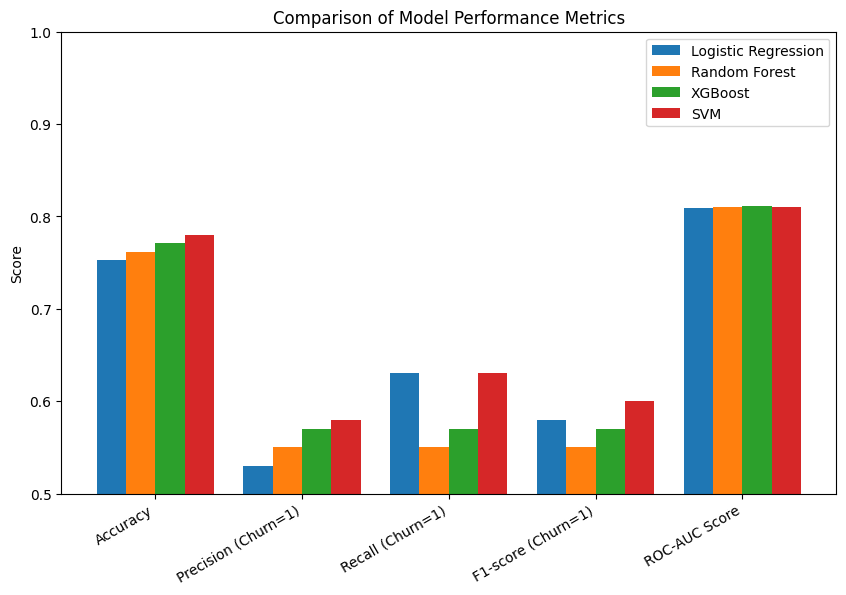

In [64]:
# Define the models and their metrics
models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'SVM']
metrics = ['Accuracy', 'Precision (Churn=1)', 'Recall (Churn=1)', 'F1-score (Churn=1)', 'ROC-AUC Score']

values = np.array([
    [0.7523, 0.53, 0.63, 0.58, 0.8094],  # Logistic Regression
    [0.7616, 0.55, 0.55, 0.55, 0.8097],  # Random Forest
    [0.7708, 0.57, 0.57, 0.57, 0.8110],  # XGBoost
    [0.7801, 0.58, 0.63, 0.60, 0.8101]   # SVM
])

# Set up bar width and x-axis positions
bar_width = 0.2
x = np.arange(len(metrics))

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each model's metrics as grouped bars
for i, model in enumerate(models):
    ax.bar(x + i * bar_width, values[i], width=bar_width, label=model)

# Formatting
ax.set_xticks(x + bar_width * (len(models) / 2 - 0.5))
ax.set_xticklabels(metrics, rotation=30, ha="right")
ax.set_ylabel("Score")
ax.set_title("Comparison of Model Performance Metrics")
ax.legend()
plt.ylim(0.5, 1)  # Keep y-axis within a useful range for better visibility

plt.show()

#### **Key Insights from Model Evaluation**
1. **Overall Model Performance**

- All four models—Logistic Regression, Random Forest, XGBoost, and SVM—performed well, with accuracy scores ranging between 75% and 78%.
- SVM achieved the highest accuracy (78.01%), closely followed by XGBoost (77.08%), suggesting these models effectively distinguish between churn and non-churn customers.

2. Precision, Recall, and F1-Score Trade-offs

- Precision (for Churn=1, meaning correct churn predictions):
XGBoost (0.57) and SVM (0.58) had the highest precision, meaning fewer false churn predictions.
- Recall (for Churn=1, meaning correctly identified actual churners):
SVM (0.63) and Logistic Regression (0.63) had the best recall, meaning they captured more actual churn cases.
- Random Forest had the lowest recall (0.55), indicating it missed more true churn cases.
F1-Score (for Churn=1, balancing precision and recall):
- SVM had the highest F1-score (0.60), followed by XGBoost (0.57), showing they are better at handling both false positives and false negatives.
  
3. **ROC-AUC Score – Model Discrimination Ability**

XGBoost had the highest ROC-AUC score (0.8110), followed closely by SVM (0.8101).
Since ROC-AUC measures how well the model separates churn vs. non-churn cases, this suggests that XGBoost and SVM are the best models for predicting customer churn.

4. **Choosing the Best Model**

- If prioritizing overall accuracy and F1-score: SVM is the best choice.
- If prioritizing overall model discrimination (ROC-AUC score): XGBoost is the best choice.
- If prioritizing interpretability: Logistic Regression is ideal, as it provides insights into feature importance.
- Random Forest performed the weakest, especially in recall, meaning it might not be the best option for identifying churn cases.
  
## 7. **Conclusion**
SVM and XGBoost outperformed other models, making them the best choices for churn prediction.
XGBoost is slightly better at distinguishing churners from non-churners, while SVM balances precision and recall effectively.
Random Forest underperformed in recall, meaning it may not be suitable for detecting churn cases.
Logistic Regression remains a solid baseline model for interpretability.